In [ ]:
import os 
import sys
import numpy as np
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/Brown/Deep Learning/Final Project"
%cd "/content/drive/My Drive/Brown/Deep Learning/Final Project"
!pwd
!git clone https://github.com/anshu957/OrderChaosHNN.git

ls: cannot access '/content/drive/My Drive/Brown/Deep Learning/Final Project': No such file or directory
[Errno 2] No such file or directory: '/content/drive/My Drive/Brown/Deep Learning/Final Project'
/content
/content
Cloning into 'OrderChaosHNN'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 77 (delta 16), reused 14 (delta 14), pack-reused 57
Unpacking objects: 100% (77/77), done.


In [ ]:
#Harmonic oscillator 
from matplotlib import pyplot as plt

def oscillator(d, w0, x):
    """Gives analytical solution to 1D underdamped harmonic oscillator problem. 
    Equations taken from: https://beltoforion.de/en/harmonic_oscillator/"""
    assert d < w0
    w = np.sqrt(w0**2-d**2)
    phi = np.arctan(-d/w)
    A = 1/(2*np.cos(phi))
    cos = tf.math.cos(phi+w*x)
    sin = tf.math.sin(phi+w*x)
    exp = tf.math.exp(-d*x)
    y  = exp*2*A*cos
    return y

(10, 1) (10, 1)


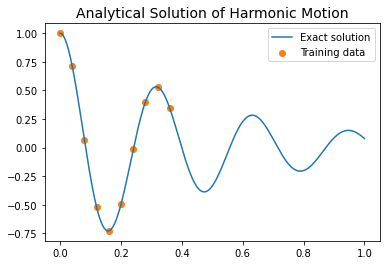

In [ ]:
#Generate training data

#hyperparameters
d, w0 = 2, 20
mu, k = 2*d, w0**2

# get the analytical solution over the full domain
x = tf.reshape(tf.linspace(0,1,500), [-1,1])
y = tf.reshape(oscillator(d, w0, x), [-1, 1])


# slice out a small number of points from the LHS of the domain
x_data = x[0:200:20]
y_data = y[0:200:20]
print(x_data.shape, y_data.shape)

plt.figure()
plt.plot(x, y, label="Exact solution")
plt.scatter(x_data, y_data, color="tab:orange", label="Training data")
plt.title('Analytical Solution of Harmonic Motion', fontsize=14)
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model
from keras.layers.core import Flatten, Dense, Dropout, Reshape
from keras.models import Model
from keras.layers import Input, ZeroPadding2D, Dropout
from keras import layers
from keras import optimizers
from keras.optimizers import SGD

In [ ]:
seq_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1,activation="tanh")
])

seq_model.compile(optimizer = 'adam', loss = 'mse',)
seq_model.fit(x_data, y_data, batch_size = 16,verbose=2, epochs = 700)

gt = x
y_pred = seq_model.predict(x)
plt.plot(y_pred,label='predicted')
#plt.scatter(x_data,y_data, color="tab:green", label="Training data")
plt.plot(y,label='ground truth')
plt.legend()

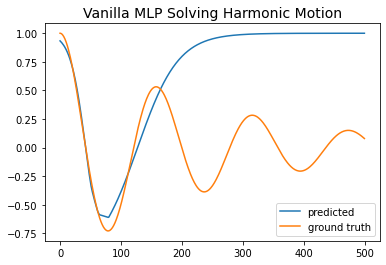

In [ ]:
plt.plot(y_pred,label='predicted')
#plt.scatter(x_data,y_data, color="tab:green", label="Training data")
plt.plot(y,label='ground truth')
plt.title('Vanilla MLP Solving Harmonic Motion', fontsize=14)
plt.legend()

In [ ]:
seq_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1,activation="tanh")
])

seq_model.compile(optimizer = 'adam', loss = 'mse',)
seq_model.fit(x_data, y_data, batch_size = 16,verbose=2, epochs = 70)

gt = x
y_pred = seq_model.predict(x)
plt.plot(y_pred,label='predicted')
#plt.scatter(x_data,y_data, color="tab:green", label="Training data")
plt.plot(y,label='ground truth')
plt.legend()

In [ ]:
seq_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1,activation="tanh")
])

seq_model.compile(optimizer = 'adam', loss = 'mse',)
seq_model.fit(x_data, y_data, batch_size = 16,verbose=2, epochs = 300)

gt = x
y_pred = seq_model.predict(x)
plt.plot(y_pred,label='predicted')
#plt.scatter(x_data,y_data, color="tab:green", label="Training data")
plt.plot(y,label='ground truth')
plt.legend()

In [ ]:
seq_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1,activation="tanh")
])

seq_model.compile(optimizer = 'adam', loss = 'mse',)
seq_model.fit(x_data, y_data, batch_size = 16,verbose=2, epochs = 700)

gt = x
y_pred = seq_model.predict(x)
plt.plot(y_pred,label='predicted')
#plt.scatter(x_data,y_data, color="tab:green", label="Training data")
plt.plot(y,label='ground truth')
plt.legend()

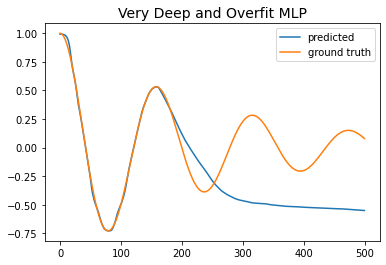

In [ ]:
plt.plot(y_pred,label='predicted')
#plt.scatter(x_data,y_data, color="tab:green", label="Training data")
plt.plot(y,label='ground truth')
plt.title('Very Deep and Overfit MLP', fontsize=14)

plt.legend()

In [ ]:
seq_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1,activation="tanh")
])

seq_model.compile(optimizer = 'adam', loss = 'mse',)
seq_model.fit(x_data, y_data, batch_size = 16,verbose=2, epochs = 700)

gt = x
y_pred = seq_model.predict(x)
plt.plot(y_pred,label='predicted')
#plt.scatter(x_data,y_data, color="tab:green", label="Training data")
plt.plot(y,label='ground truth')
plt.legend()

In [ ]:
initializer = tf.keras.initializers.GlorotNormal()
ub = 1 
lb = -1 
inputs = layers.Input(shape=(2,), dtype=tf.float64)
z = layers.Lambda(lambda X: 2.0*(X - lb)/(ub - lb) - 1.0)(inputs)
z = layers.Dense(20, activation="tanh", kernel_initializer=initializer)(z)
z = layers.Dense(20, activation="tanh", kernel_initializer=initializer)(z)
z = layers.Dense(20, activation="tanh", kernel_initializer=initializer)(z)
z = layers.Dense(20, activation="tanh", kernel_initializer=initializer)(z)

outputs = layers.Dense(1, kernel_initializer=initializer)(z)

U_model = tf.keras.Model(inputs=inputs, outputs=outputs)

U_model.summary()
def F_model(x,t):
    t = tf.Variable(t)
    with tf.GradientTape(persistent=True) as tape:
        u = tf.squeeze(tf.cast(U_model(tf.stack([x,t], 1)), tf.float64))
        u_t = tape.gradient(u,t)
        u_tt = tape.gradient(u_t,t)

        f = u_tt + mu*u_t + k*u
    return f

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 lambda (Lambda)             (None, 2)                 0         
                                                                 
 dense_107 (Dense)           (None, 20)                60        
                                                                 
 dense_108 (Dense)           (None, 20)                420       
                                                                 
 dense_109 (Dense)           (None, 20)                420       
                                                                 
 dense_110 (Dense)           (None, 20)                420       
                                                                 
 dense_111 (Dense)           (None, 1)                 21    

In [ ]:
#Define fully connected network for our PINN
class FCN(tf.keras.Model):
    "Defines a connected network"

    def __init__(self, N_INPUT, N_OUTPUT, N_HIDDEN, N_LAYERS):
        super().__init__()
        self.fcs = tf.keras.Sequential()
        self.fcs.add(tf.keras.layers.Dense(N_HIDDEN, input_dim=N_INPUT, activation="tanh"))
        self.fch = tf.keras.Sequential()
        for _ in range(N_LAYERS-1):
            self.fch.add(tf.keras.layers.Dense(N_HIDDEN, activation="tanh"))
        self.fce = tf.keras.layers.Dense(N_OUTPUT)
        
    def call(self, x):
        output = self.fcs(x)
        output = self.fch(output)
        output = self.fce(output)
        return output

In [56]:
# sample locations over the problem domain
x_physics = tf.linspace(0., 1., 30, name='x_physics')
x_physics = tf.reshape(x_physics, [-1, 1])
x_physics = tf.Variable(x_physics)

mu, k = 2 * d, w0**2

# Create a TensorFlow random seed
tf.random.set_seed(123)

# Create the model
model = FCN(1, 1, 32, 3)

# Create the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

# Initialize an empty list to store the results of each iteration
files = []


# Train the model
for i in range(20000):
    with tf.GradientTape(persistent=True) as tape:
        # Compute the "data loss"
        yh = model(x_data)

        yh = tf.cast(yh, tf.float32)
        y_data = tf.cast(y_data, tf.float32)

        loss1 = tf.reduce_mean(tf.square(yh - y_data) ** 2)

        # Compute the "physics loss"
        yhp = model(x_physics)
        dx = tape.gradient(yhp, x_physics, tf.ones_like(yhp)) # computes dy/dx
        dx2 = tape.gradient(dx, x_physics, tf.ones_like(dx)) # computes d^2y/dx^2 
        physics = dx2 + mu*dx + k*yhp # computes the residual of the 1D harmonic oscillator differential equation
        loss2 = (1e-4)*tf.reduce_mean(tf.square(physics))

        # Add the two loss terms together
        loss = loss1 + loss2

    # Backpropagate
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        del tape

16/16 [==============================] - 0s 2ms/step


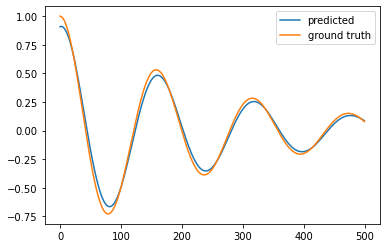

In [57]:
gt = x
y_pred = model.predict(x)
plt.plot(y_pred,label='predicted')
#plt.scatter(x_data,y_data, color="tab:green", label="Training data")
plt.plot(y,label='ground truth')
plt.legend()